In [8]:
import sys
from os.path import expanduser
import pandas as pd

# Add path to folder containing safepy
sys.path.append(expanduser('~') + '/Lab/Utils/Python/Networks/safepy/')

import safe

%matplotlib inline

# Example 3 -- Annotating a Scatter plot

In this example, SAFE is run on a scatter plot (e.g., a UMAP projection of a high-dimensional dataset). A scatter plot can be thought of as a fully connected network. Node neighborhoods are defined using Euclidean distance.

In [2]:
sf = safe.SAFE()

In [3]:
# SAFE recognizes the type of input file from the file extension. So, ".scatter" here indicates that the input file contains 
# a list of nodes with coordinates (instead of a list of node pairs, as is the case in proper networks)
sf.load_network(network_file='~/Lab/Datasets/safe-data/networks/YeastPhenome_UMAP_1586.scatter', 
                node_key_attribute='key')

Loading network from ~/Lab/Datasets/safe-data/networks/YeastPhenome_UMAP_1586.scatter
Loading the file of node coordinates...


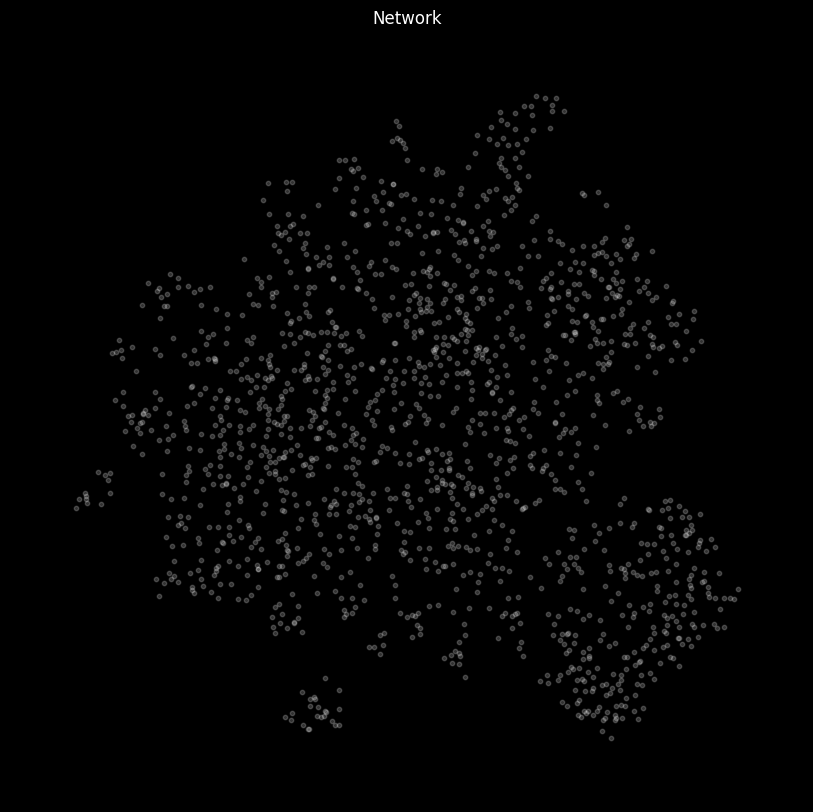

In [4]:
sf.plot_network()

In [24]:
sf.define_neighborhoods(node_distance_metric='euclidean', neighborhood_radius=0.06)

Node distance metric: euclidean
Neighborhood definition: 0.06 x diameter
Number of nodes per neighborhood (mean +/- std): 30.92 +/- 10.84


In [25]:
att = pd.read_csv('~/Lab/Datasets/safe-data/attributes/YeastPhenome_screen158_NPVs.txt', sep='\t')

In [26]:
att.set_index('Gene systematic name', inplace=True)
att = att[['NPV hap alpha | growth (spot assay) | standard | YPG [3%] | Merz S~Westermann B, 2009']]

In [27]:
# The load_attribute function expects a file (or a Pandas dataframe) where the first column/index is the node label 
# (that should match the node labels in the network) and the other columns are attributes.
sf.load_attributes(attribute_file=att)


Attribute data provided: 4866 labels x 1 attributes
YHR006W, YCL007C, YHR009C and 3317 other labels in the attribute file were not found in the network.

Attribute data mapped onto the network: 1546 labels x 1 attributes
Values: 40 NaNs
Values: 1295 zeros
Values: 0 positives
Values: 251 negatives


In [28]:
sf.compute_pvalues(num_permutations=10000)

Current settings (possibly overwriting global ones):
	num_permutations=10000
Using randomization to calculate enrichment...


100%|██████████| 10000/10000 [00:55<00:00, 181.56it/s]


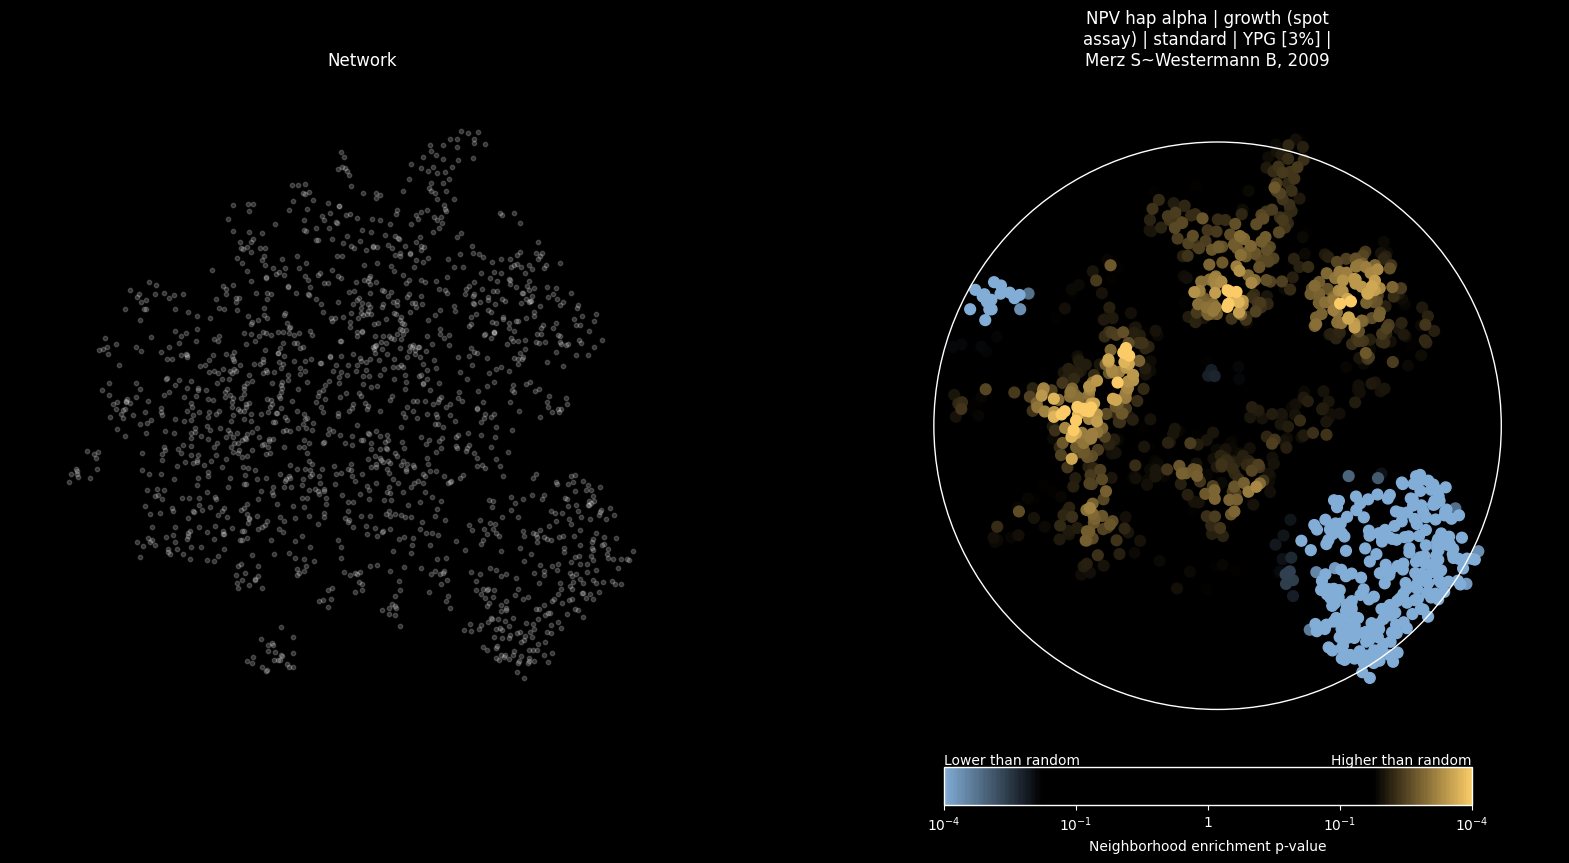

In [29]:
# Plot a random attribute
sf.plot_sample_attributes()

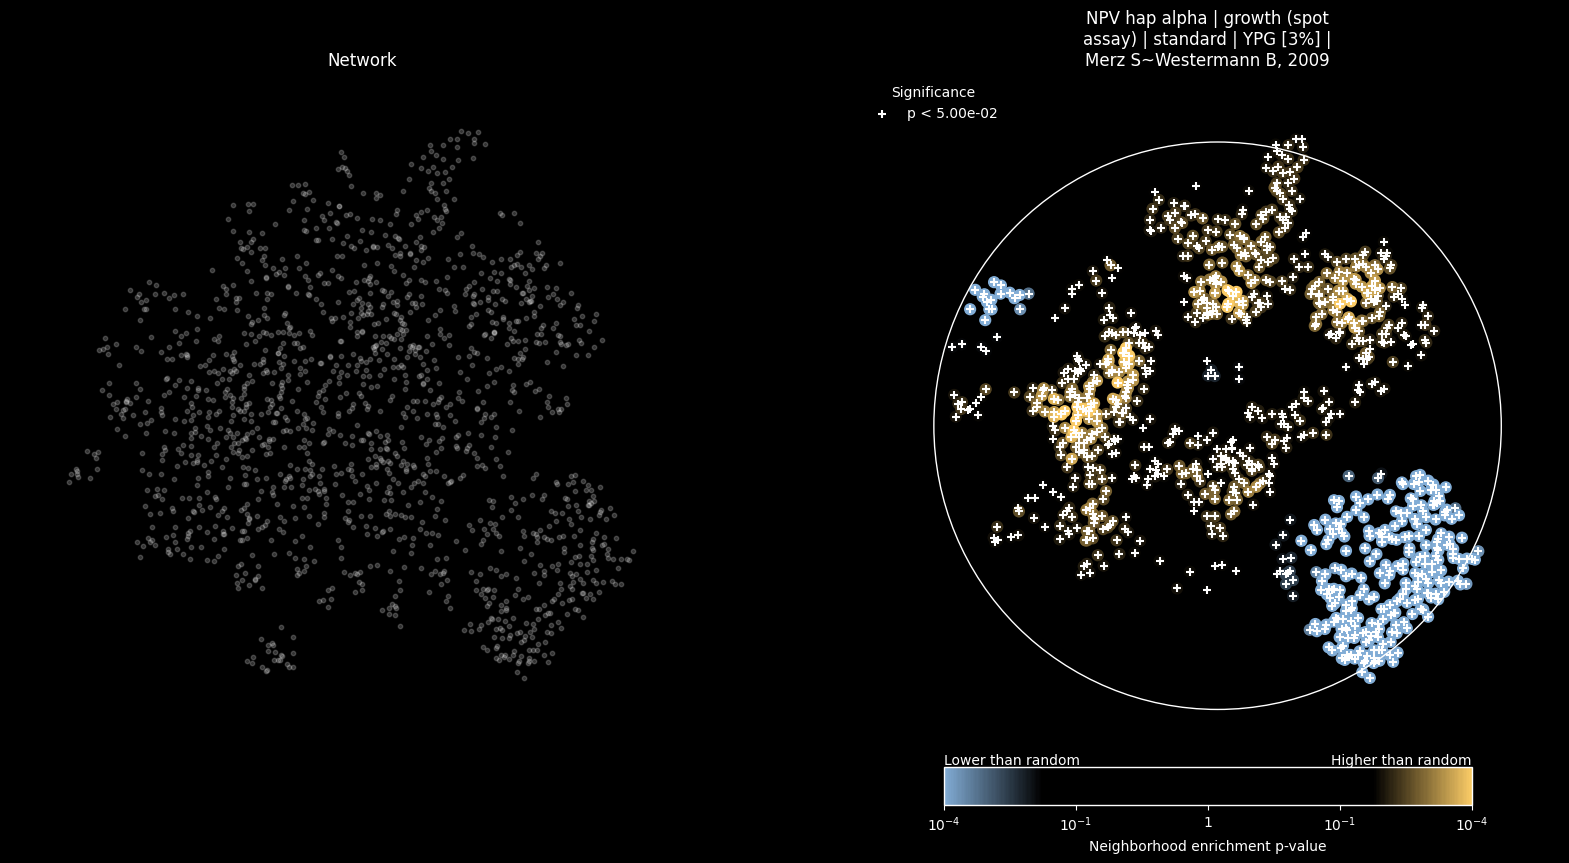

In [30]:
# Map the significant nodes
sf.plot_sample_attributes(show_significant_nodes=True)

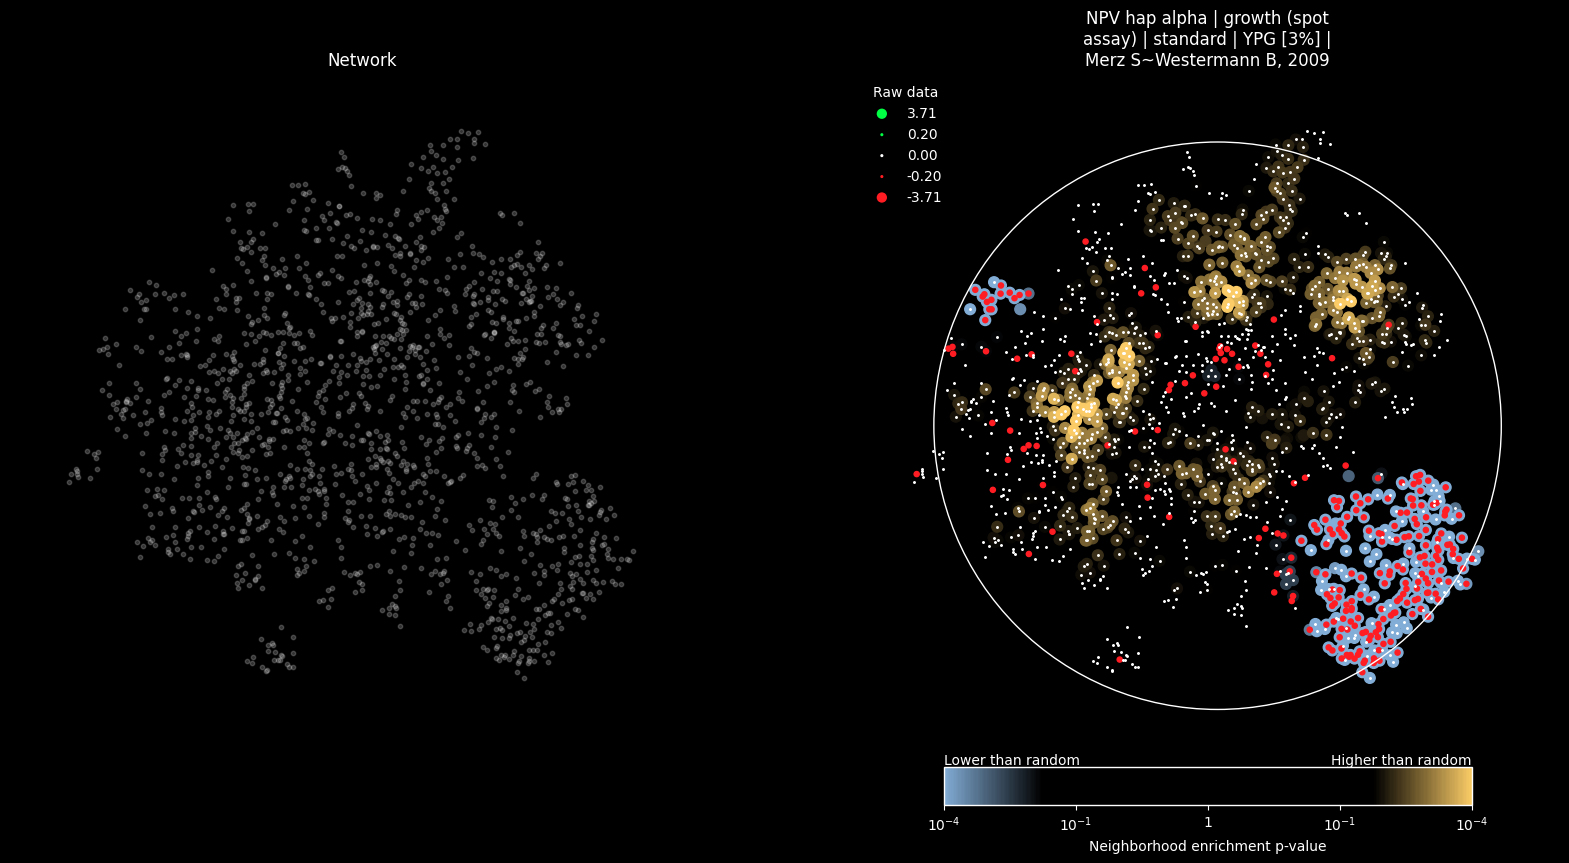

In [31]:
# Map the raw data onto the network
sf.plot_sample_attributes(show_raw_data=True)

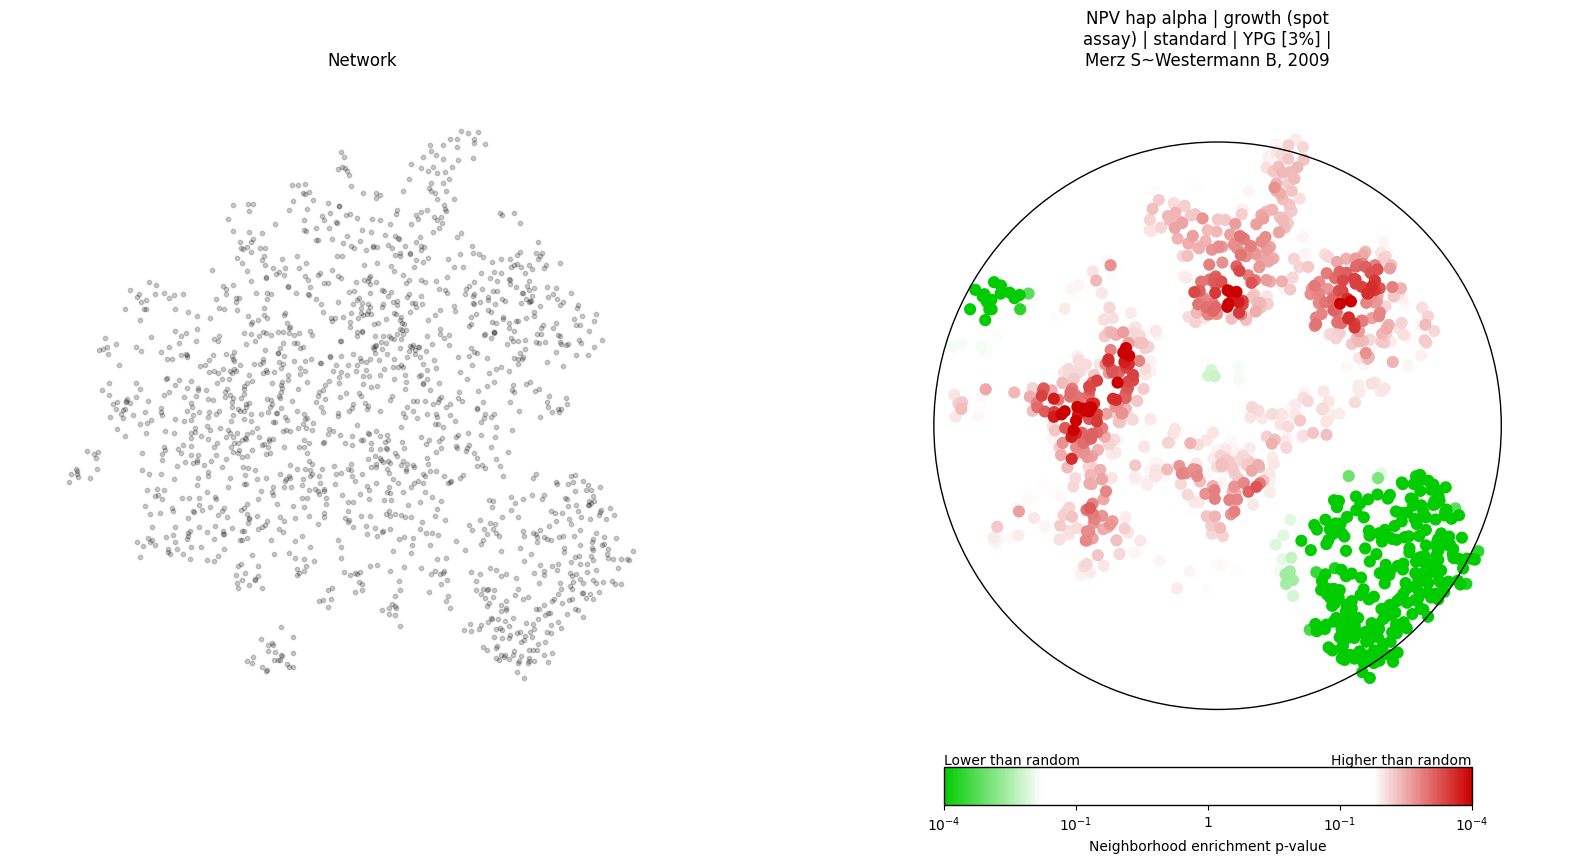

In [32]:
# Change the background color and the enrichment colors
sf.plot_sample_attributes(background_color='#ffffff', colors=['00cc00','cc0000'])

Output path: /Users/abaryshnikova/Lab/Utils/Python/Networks/safepy/merz_westermann.pdf


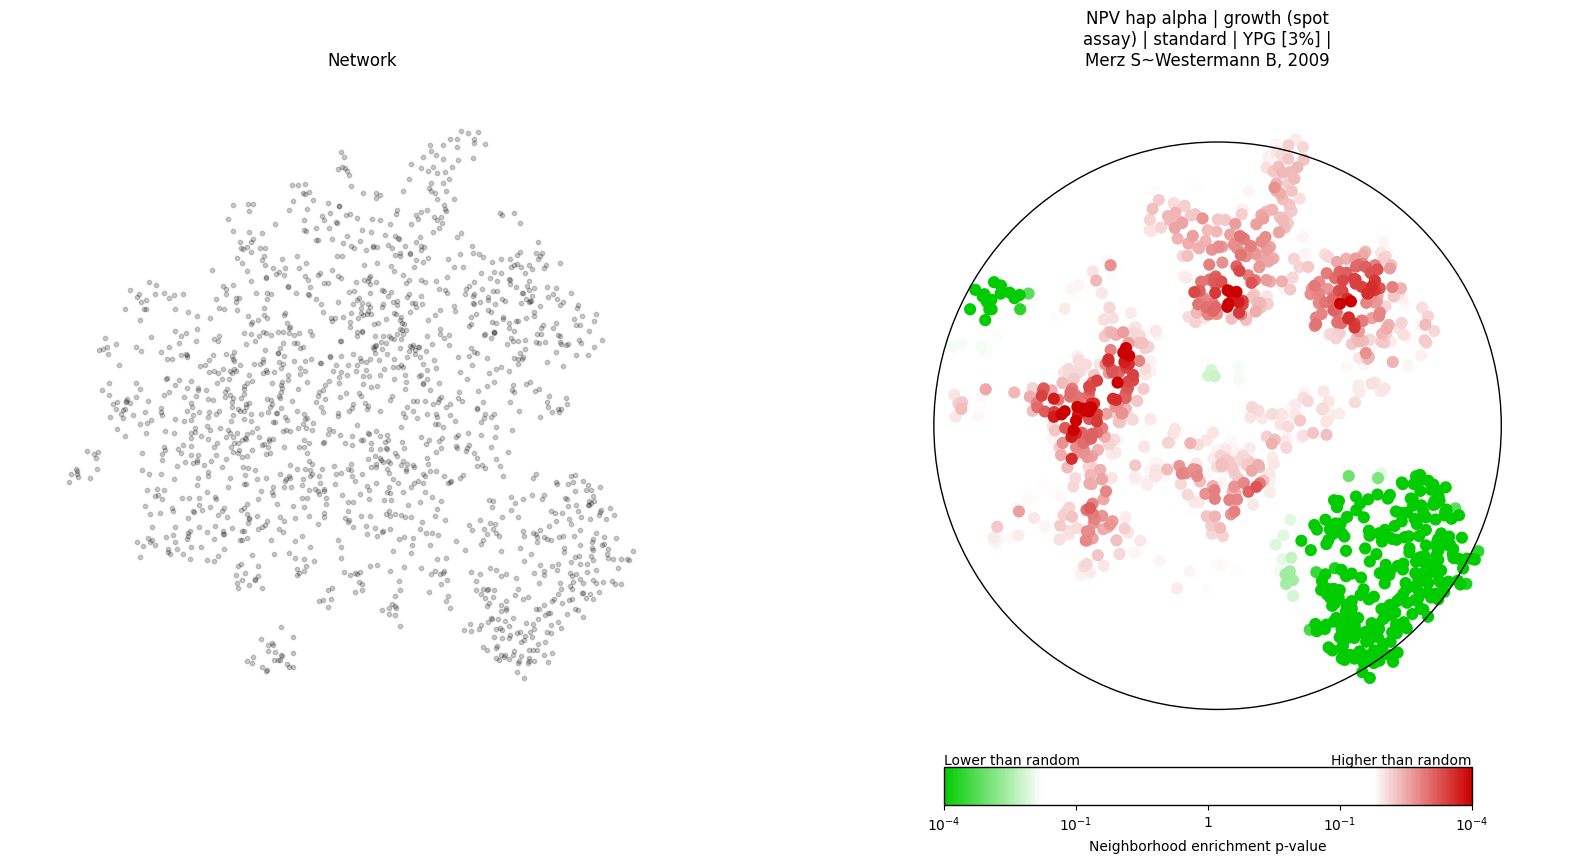

In [33]:
# Change the background color and the enrichment colors
sf.plot_sample_attributes(background_color='#ffffff', colors=['00cc00','cc0000'], save_fig='merz_westermann.pdf')

In [35]:
# Print output files into the current directory
sf.print_output_files(output_dir='./')

./attribute_properties_annotation.txt
./node_properties_annotation.txt
